**Project Objective** :- This project's all about building a machine learning model to predict diabetes in Pima Indian women based on their clinical health data. I'll start with some solid exploratory data analysis (EDA) on the dataset, then test out a bunch of different ML algorithms to figure out which one delivers the best accuracy and reliability.

In [2]:
from google .colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''
In this section, we import the essential libraries required to process and visualize our data. Pandas and NumPy provide the foundational tools
for data manipulation and complex numerical operations, allowing us to handle the Pima Indian dataset efficiently. To uncover hidden patterns
and trends, we utilize Matplotlib and Seaborn for high-quality statistical visualizations. Together, these tools form the ecosystem necessary
for performing thorough Exploratory Data Analysis and preparing our features for machine learning.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Next, we import our required dataset that we are going to work with
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Basic Data Inspection

In [5]:
#First, we inspect the dataset to understand the structure of the dataset, identify datatypes, checking for missing or invalid values, and to obtain a statistical summary of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Here, we will get the count of values, mean, standard deviation, minimum, etc.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

Checking for missing values

In [8]:
#We begin by identifying and handling missing or "zero" values in critical columns
a=(df == 0).sum()
a

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Handling Missing Values

In [9]:
#Next, we replace the missing or "zero" values with mean or median values to maintain data consistency
#Mean= summation of all values/number of values
#for even values of number of values, median=middle value at position ((number of values +1)/2)
#for odd values of number of values, median=middle average of 2 middle values at positions (number of values/2) and ((number of values +1)/2))
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())
(df[cols] == 0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


In [10]:
zero_after_required = a.copy()
for col in cols:
    zero_after_required[col] = 0
zero_after_required

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [11]:
#Next, we implement the training and testing with train test function. The data was split into training and testing sets to access model generalization.
#Formula- Z=(X-mean)/standard deviation
#Here we use Standard scaler for the standardiztion process to rescale the data so that each feature has a mean of 0 and a standard deviation of 1.
from sklearn.model_selection import train_test_split
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)

In [12]:
X_train.shape, y_train.shape

((576, 8), (576,))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.85547074, -0.01926647,  0.48607505, ...,  0.95537387,
        -0.65845729, -0.46648591],
       [ 2.46780492, -1.11572485,  0.15956866, ...,  0.40608802,
        -0.30699915,  1.21865604],
       [-0.85547074, -0.45120462, -0.9832037 , ...,  0.43577915,
        -0.19585426, -0.8035143 ],
       ...,
       [-0.85547074, -0.81669075, -0.16693773, ...,  0.8217638 ,
        -0.78762567, -0.29797171],
       [ 1.56145701,  1.14364393,  1.13908782, ...,  0.25763238,
         2.12917653,  0.71311346],
       [ 0.05087717,  0.74493179, -1.14645689, ..., -0.45495466,
        -0.58035548,  0.29182797]])

In [14]:
X_test_scaled

array([[ 2.76992089, -0.58410867, -0.00368453, ..., -0.20258009,
        -0.04565848,  0.37608507],
       [ 0.05087717,  0.1800896 ,  1.30234102, ...,  0.28732351,
         0.35386232, -0.46648591],
       [-0.55335477, -0.91636878,  0.32282185, ..., -0.14319783,
         0.50706202, -0.8877714 ],
       ...,
       [-1.15758671, -0.51765665, -0.16693773, ...,  1.01475612,
         0.37488973, -0.97202849],
       [ 0.35299314,  0.08041156,  0.15956866, ...,  0.21309569,
        -0.78161784,  0.37608507],
       [-0.2512388 ,  0.21331561, -0.00368453, ..., -0.02443332,
         0.20667045, -0.55074301]])

In [15]:
#Next, we implement normalization, using Min Max Scaler
#Formula- X'=(X-Xmin)/(Xmax-Xmin)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm= scaler.transform(X_test)

In [16]:
X_test_norm, X_train_norm

(array([[0.76470588, 0.33566434, 0.48979592, ..., 0.26584867, 0.16971047,
         0.28333333],
        [0.23529412, 0.4965035 , 0.65306122, ..., 0.33333333, 0.22895323,
         0.11666667],
        [0.11764706, 0.26573427, 0.53061224, ..., 0.27402863, 0.25167038,
         0.03333333],
        ...,
        [0.        , 0.34965035, 0.46938776, ..., 0.43353783, 0.23207127,
         0.01666667],
        [0.29411765, 0.47552448, 0.51020408, ..., 0.32310838, 0.06057906,
         0.28333333],
        [0.17647059, 0.5034965 , 0.48979592, ..., 0.29038855, 0.20712695,
         0.1       ]]),
 array([[0.05882353, 0.45454545, 0.55102041, ..., 0.42535787, 0.07884187,
         0.11666667],
        [0.70588235, 0.22377622, 0.51020408, ..., 0.34969325, 0.13095768,
         0.45      ],
        [0.05882353, 0.36363636, 0.36734694, ..., 0.35378323, 0.14743875,
         0.05      ],
        ...,
        [0.05882353, 0.28671329, 0.46938776, ..., 0.40695297, 0.0596882 ,
         0.15      ],
        [0.5

Exploratory Data Analysis(EDA)

In [17]:
'''
Exploratory Data Analysis (EDA) serves as the visual backbone of our project, allowing us to understand the underlying distribution
and relationships within the health data. We utilize Histograms and Boxplots to detect outliers and see the spread of variables like
BMI and Blood Pressure, while Correlation Heatmaps help us identify which clinical factors have the strongest link to a diabetes
diagnosis. By plotting Scatter Plots and Pairplots, we can observe how specific features interact, such as the relationship between
Age and Glucose levels. These visualizations are critical for identifying data imbalances and ensuring our machine learning model is
built on a clear understanding
of the patient profiles.
'''
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

'\nplt.hist(df["Glucose"], bins=20)\nplt.title("Histogram: Glucose")\nplt.xlabel("Glucose")\nplt.ylabel("Frequency")\n'

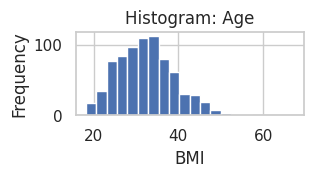

In [18]:
#Histogram(only for bmi)
plt.subplot(4, 3, 2)
plt.hist(df["BMI"], bins=20)
plt.title("Histogram: Age")
plt.xlabel("BMI")
plt.ylabel("Frequency")
'''
plt.hist(df["Glucose"], bins=20)
plt.title("Histogram: Glucose")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
'''

Text(0, 0.5, 'Count')

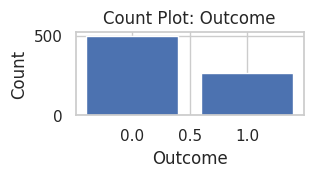

In [19]:
#Count Plot(Outcome)
plt.subplot(4, 3, 3)
counts = df["Outcome"].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Count Plot: Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")

Text(0.5, 1.0, 'Blood pressure vs Outcome')

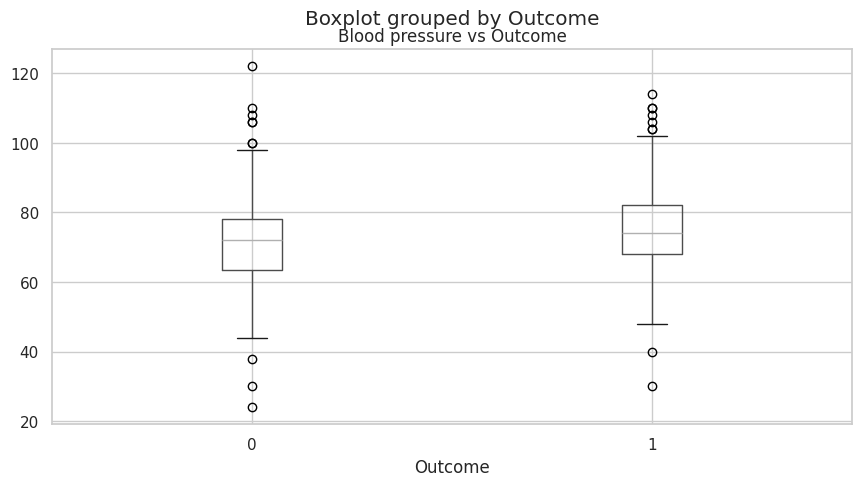

In [20]:
#Boxplot(Blood pressure vs Outcome)
df.boxplot(column="BloodPressure", by="Outcome")
plt.title("Blood pressure vs Outcome")

Text(0.5, 1.0, 'Correlation Heatmap')

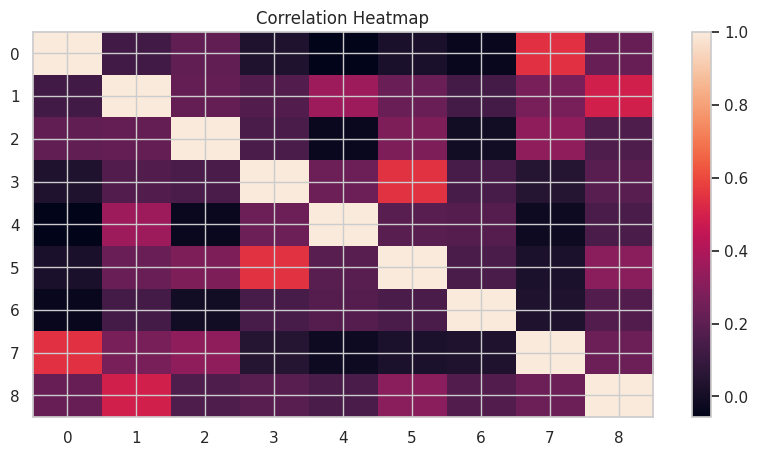

In [21]:
#Correlation Heatmap
plt.imshow(df.corr(), aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Scatter: Age vs BMI')

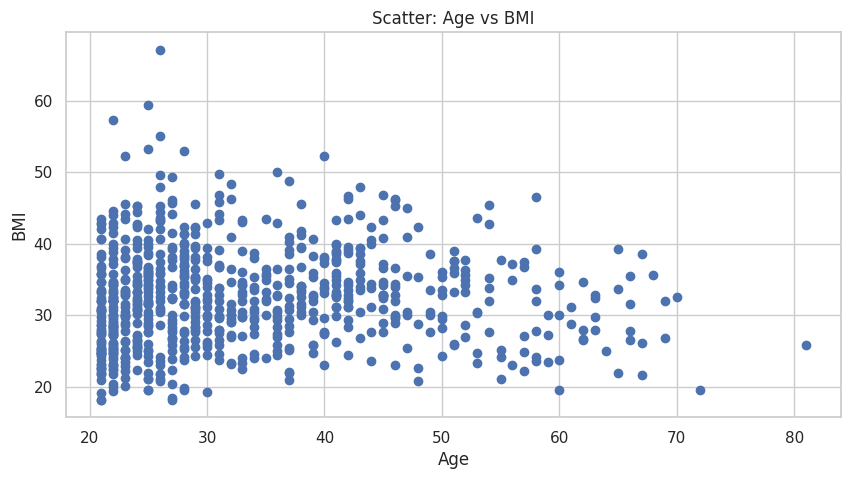

In [22]:
#Scatter plot(Age vs BMI)
plt.scatter(df["Age"], df["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter: Age vs BMI")

Text(0.5, 1.0, 'Line Plot: Age vs BMI')

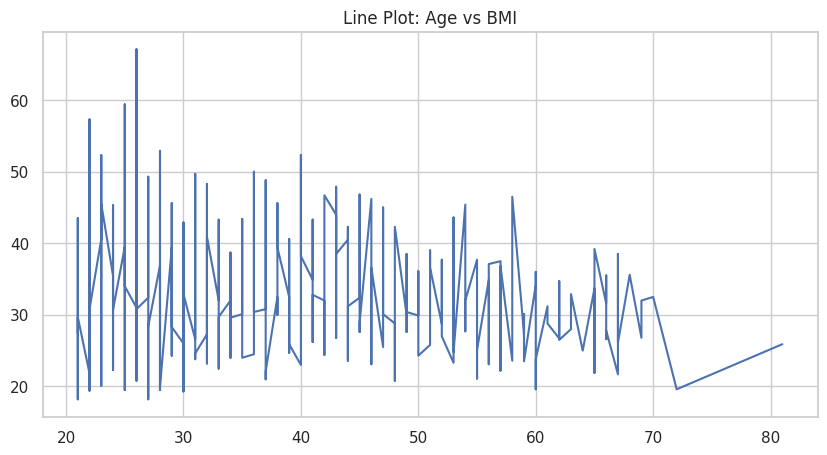

In [23]:
#Line plot(Age vs BMI)
df_sorted = df.sort_values("Age")
plt.plot(df_sorted["Age"], df_sorted["BMI"])
plt.title("Line Plot: Age vs BMI")

Text(0.5, 1.0, 'Mean BMI vs Outcome')

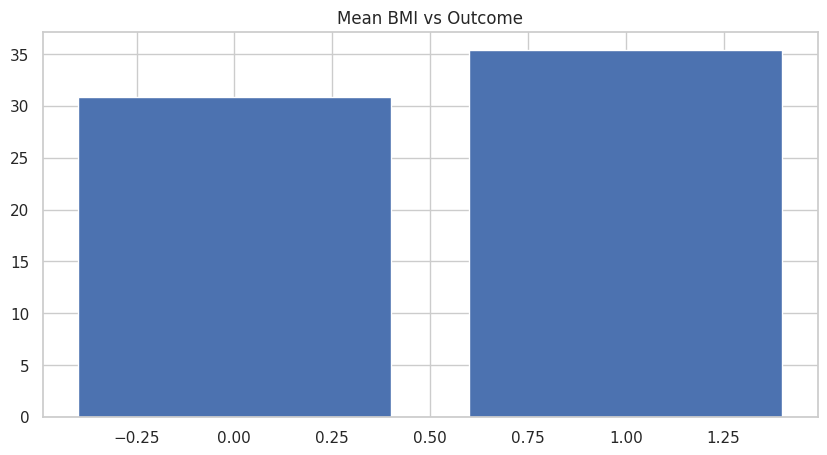

In [24]:
#Bar plot(Mean BMI vs Outcome)
means = df.groupby("Outcome")["BMI"].mean()
plt.bar(means.index, means.values)
plt.title("Mean BMI vs Outcome")

Text(0.5, 1.0, 'Outcome Distribution')

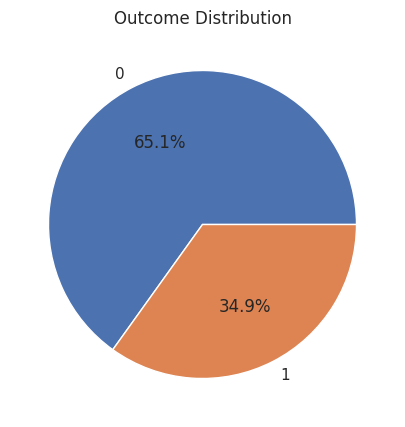

In [25]:
#Pie chart(Outcome)
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
plt.title("Outcome Distribution")

**EDA Conclusion**:- Looking at the data, a few key trends stand out immediately. While variables like BMI, age, and blood pressure follow a roughly normal curve, the box plots reveal several outliers that will need attention during cleaning. The dataset itself is relatively balanced between diabetic and non-diabetic cases, so we won't have to worry too much about heavy class imbalance. Interestingly, the scatter plots show a clear upward trend between age and BMI, and the grouped bar charts confirm that diabetic patients generally have higher BMI averages. Finally, the heatmap pinpointed glucose and age as the strongest predictors, which really helps narrow down our focus for the modeling phase. This bird's-eye view gives us exactly what we need to start the preprocessing and feature selection.

Features Engineering

In [26]:
#It is the process of cleaning and reshaping messy data into clear indicators that help the system spot important patterns more effectively.
#Think of it as translating raw numbers into a more meaningful language, ensuring the most vital details stand out for better decision-making.
df["Outcome"] = (df["Outcome"] > df["Outcome"].median()).astype(int)

In [27]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Outcome", axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"].values

In [28]:
#Feature scaling using correlation
corr = df_scaled.corr()["Outcome"].abs()
selected_features = corr[corr > 0.2].index
df_selected = df_scaled[selected_features]

In [29]:
#Final table and ratio
df_selected.loc[:, "BMI_Age_Ratio"] = df["BMI"] / (df["Age"] + 1)
df_selected.head()

/tmp/ipython-input-1112605960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, "BMI_Age_Ratio"] = df["BMI"] / (df["Age"] + 1)


,Pregnancies,Glucose,BMI,Age,Outcome,BMI_Age_Ratio
0,0.639947,0.866045,0.167240,1.425995,1,0.658824
1,-0.844885,-1.205066,-0.851551,-0.190672,0,0.831250
2,1.233880,2.016662,-1.331838,-0.105584,1,0.706061
3,-0.844885,-1.073567,-0.633239,-1.041549,0,1.277273
4,-1.141852,0.504422,1.549885,-0.020496,1,1.267647


Training and Evaluating Logistic Regression Model

In [30]:
#First we implement train-test split
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [31]:
#Then we train the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
#Finally, we make the predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [33]:
#Model Evaluation Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7012987012987013


In [34]:
'''
ROC-AUC score- This score measures the system's ability to distinguish between different categories
the higher the score, the better it is at correctly identifying a result without getting confused by 'false alarms.'
'''
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8146296296296297


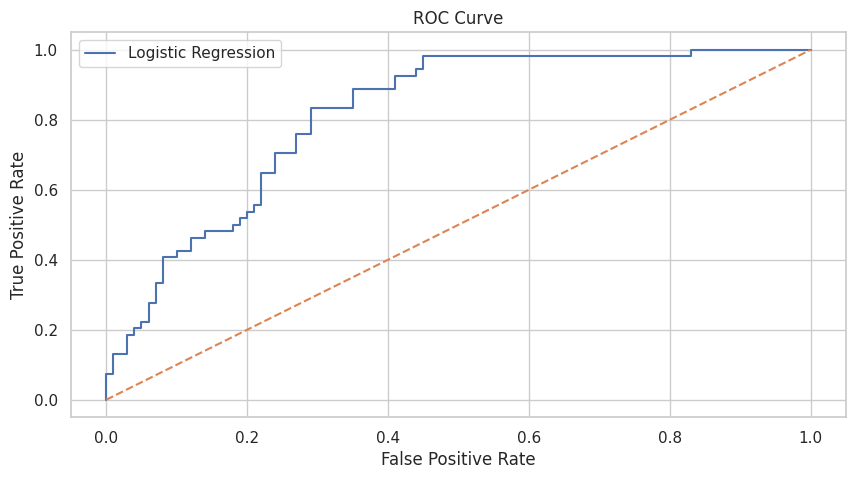

In [35]:
'''
ROC curve- graph that visualizes how well the system balances catching every relevant case against the risk of triggering false alarms.
It helps us find the 'sweet spot' where the model is as sharp as possible without being oversensitive."
'''
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Decision Tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,roc_auc_score,roc_curve)
import matplotlib.pyplot as plt
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [38]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.6688311688311688


In [39]:
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree ROC-AUC:", roc_auc_dt)

Decision Tree ROC-AUC: 0.6172222222222222


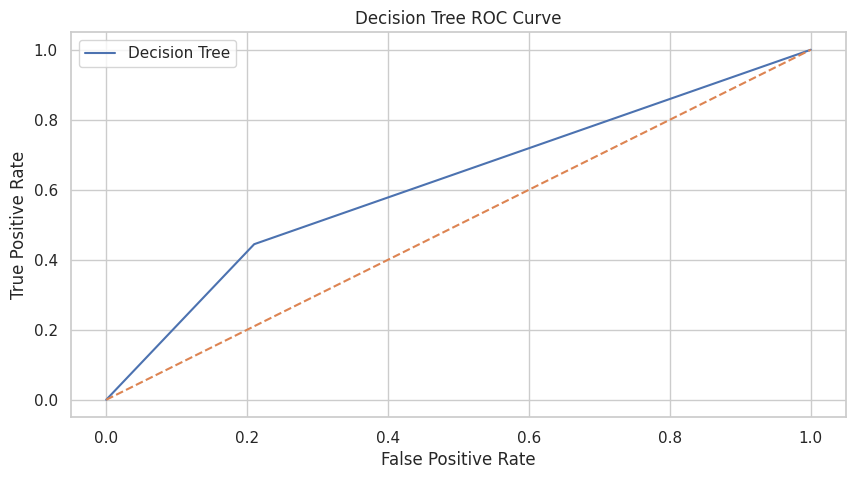

In [40]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()

Random- Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,roc_auc_score,roc_curve)
import matplotlib.pyplot as plt
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [43]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7597402597402597


In [44]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

Random Forest ROC-AUC: 0.8217592592592592


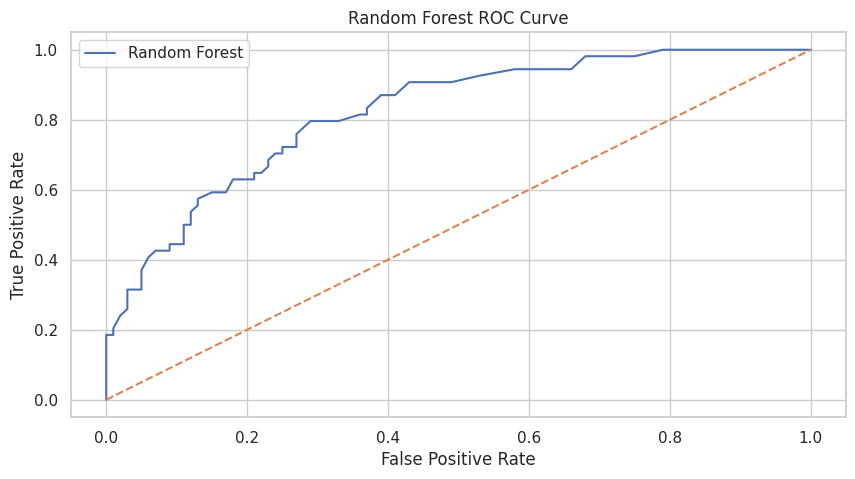

In [45]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score,roc_auc_score,roc_curve)
import matplotlib.pyplot as plt
gb_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [48]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.7597402597402597


In [49]:
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("Gradient Boosting ROC-AUC:", roc_auc_gb)

Gradient Boosting ROC-AUC: 0.8272222222222222


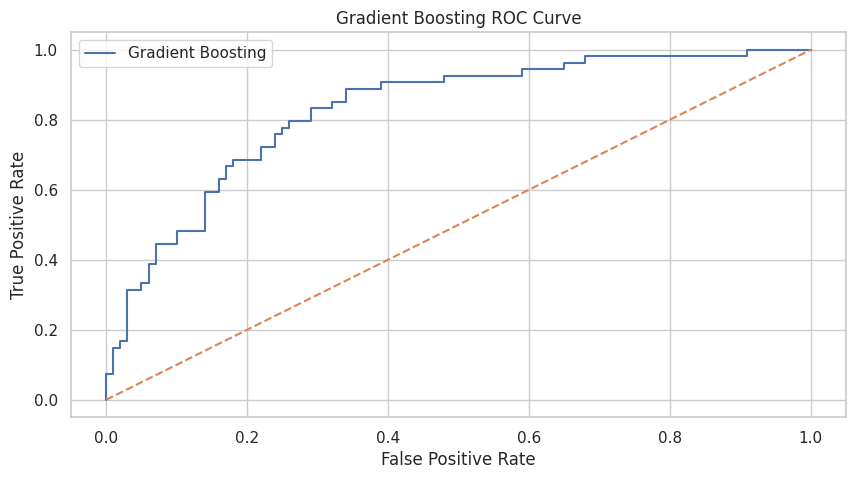

In [50]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.show()

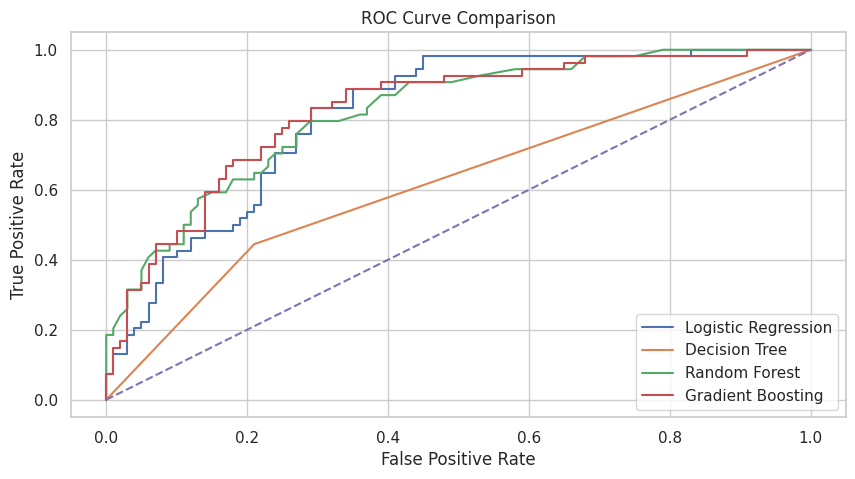

In [51]:
#COmparison with other training techniques
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()